## Doc2Vec vizualisations

In [197]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from tsne_python.tsne import tsne
from part_ii_svm.doc_embeddings import Doc2VecModel
from data_model.formatted_data import X_test_blind, y_test_blind

In [138]:
doc2vec_model = Doc2VecModel()
doc2vec_model.fit()
model = doc2vec_model.d2v_model

In [369]:
def get_feat_from_sent(list_feat):
    res = []
    for elt in list_feat:
        res.append(elt.split(' '))
    return res

In [224]:
pos_words_thesaurus = ['acceptable', 'excellent', 'exceptional', 'favorable', 'great', 'marvelous', 'positive',
                       'satisfactory', 'satisfying', 'superb', 'valuable', 'wonderful', 'good']
neg_words_thesaurus = ['bad', 'atrocious', 'awful', 'cheap', 'crummy', 'dreadful', 'lousy', 'poor', 'rough',
                       'sad', 'unacceptable']

### Heatmaps

#### Intensification

In [139]:
features_all_intensification = [['i', 'like', 'it'], ['i', 'like', 'it', 'a', 'lot'],
                                ['i', 'hate', 'it'], ['i', 'hate', 'it', 'so', 'much'],
                                ['the', 'movie', 'is', 'good'], ['the', 'movie', 'is', 'incredibly', 'good']]

sentences_intensification = ['I like it','I like it a lot',
                            'I hate it','I hate it so much',
                            'The movie is good','The movie is incredibly good']

z_intensification = []
for feat in features_all_intensification:
    z_intensification.append(model.infer_vector(feat))
z_intensification = np.array(z_intensification)

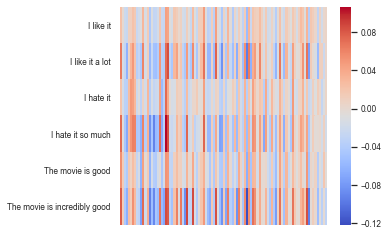

In [140]:
%matplotlib inline
sb.set(font_scale=0.75)
heat_map_intensification = sb.heatmap(z_intensification, 
                                      xticklabels=False, 
                                      yticklabels=sentences_intensification, 
                                      cmap='coolwarm')
plt.gcf().subplots_adjust(left=0.3)
plt.show()

#### Negation

In [141]:
features_all_negation = [['good'], ['not', 'good'],
                         ['bad'], ['not', 'bad'],
                         ['like'], ["n't", 'like']]

sentences_negation = ['good','not good',
                      'bad','not bad',
                      'like', "n't like"]

z_negation = []
for feat in features_all_negation:
    z_negation.append(model.infer_vector(feat))
z_negation = np.array(z_negation)

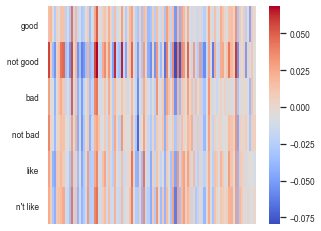

In [142]:
sb.set(font_scale=0.75)
heat_map_negation = sb.heatmap(z_negation, 
                               xticklabels=False, 
                               yticklabels=sentences_negation, 
                               cmap='coolwarm')
heat_map_negation.set_yticklabels(heat_map_negation.get_yticklabels(), rotation=360)
plt.gcf().subplots_adjust(left=0.3)
plt.show()

### t-SNE visualizations

In [198]:
X_test_vect = doc2vec_model.transform(X_test_blind)
X_test_vect = normalize(X_test_vect)
X_test_tsne = TSNE(n_components=2, perplexity=30, verbose=5, init='pca').fit_transform(X_reduced)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.359317
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 77.3400040, gradient norm = 0.4592273 (50 iterations in 0.066s)
[t-SNE] Iteration 100: error = 80.7577362, gradient norm = 0.3990222 (50 iterations in 0.069s)
[t-SNE] Iteration 150: error = 81.8576508, gradient norm = 0.4400496 (50 iterations in 0.073s)
[t-SNE] Iteration 200: error = 83.2676315, gradient norm = 0.3890927 (50 iterations in 0.162s)
[t-SNE] Iteration 250: error = 79.7783432, gradient norm = 0.4715619 (50 iterations in 0.076s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.778343
[t-SNE] Iteration 300: error = 1.6334276, gradient norm = 0.0077306 (50 iterations in 0.204s)
[t-SNE] Iteration 350: error = 1.5104091, gradient norm = 0.0023377 (

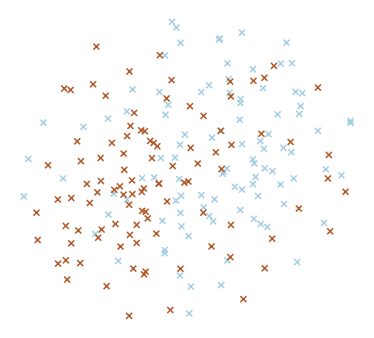

In [199]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1],
            c=y_test_blind, cmap="Paired", marker="x")
plt.show()

#### Latent representations for modifications and negations

In [273]:
pos_words_lietal_unused = ['interesting', 'best', 'fantastic', 'nice', 'good', 'very  nice', 'love so much', 'really good', 'amazing', 'terrific', 'much better', 'better', 'love', 'so nice', 'even better', 'like a lot', 'worse', 'worst', 'much worse', 'dislike', 'not interesting', 'not interesting at all', 'not nice', 'hardly useful', 'not useful', 'not useful at all', 'not bad']

pos_words_lietal_used = ['not good', 'not great', 'not good at all', 'so good', 'so bad',]

removed = ['incredibly good', 'incredibly great',
           'amazingly good', 'amazingly bad', ]

In [314]:
to_add = ['not good', 'not great', 'not good at all', 'not great at all', 'so good', 'so great',
          'not bad', 'so bad', 'very good', 'very bad', 'incredibly good', 'incredibly great',
           'amazingly good', 'amazingly bad']

In [346]:
features_thesaurus = get_feat_from_sent(list_feat=pos_words_thesaurus+neg_words_thesaurus+to_add)
X_thesaurus = []
for feat in features_thesaurus:
    X_thesaurus.append(model.infer_vector(feat))
X_thesaurus = normalize(X_thesaurus)
X_tsne_thesaurus = TSNE(learning_rate=50, perplexity=20, init='pca').fit_transform(X_thesaurus)

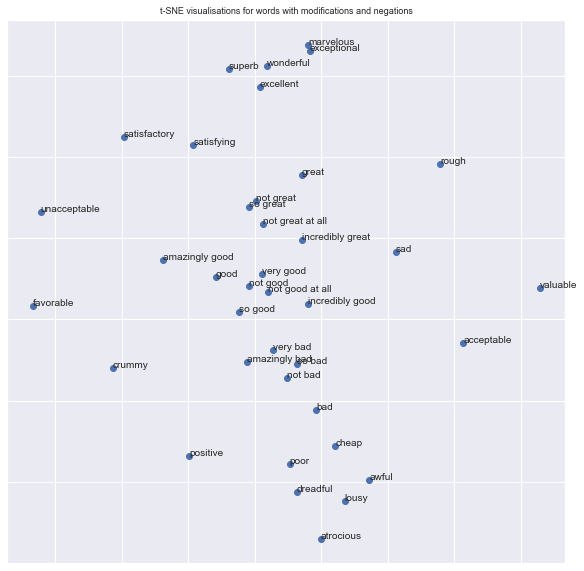

In [348]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X_tsne_thesaurus[:, 0], X_tsne_thesaurus[:, 1], 'o')
ax.set_title('t-SNE visualisations for words with modifications and negations')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
for i, word in enumerate(pos_words_thesaurus+neg_words_thesaurus+to_add):
	plt.annotate(word, xy=(X_tsne_thesaurus[i, 0], X_tsne_thesaurus[i, 1]))
plt.show()

#### Clause composition

In [385]:
sentences_clause_comp = ['i liked the movie', 'i liked the movie and it had good acting', 
'i liked the movie but it was too long', 'i liked the movie although it had bad acting', 'i hated the movie', 
'i hated the movie but it had good acting', 'i hated the movie although it had a good acting', 
'i hated the movie despite the good acting', 'i hated the movie and it was too long']

features_clause_comp = get_feat_from_sent(list_feat=sentences_clause_comp + pos_words_thesaurus + neg_words_thesaurus)

In [450]:
X_clause_comp = []
for feat in features_clause_comp:
    X_clause_comp.append(model.infer_vector(feat))
X_clause_comp = normalize(X_clause_comp)
X_tsne_clause_comp = TSNE(learning_rate=70, perplexity=20, init='random').fit_transform(X_clause_comp)

In [216]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from data_model.formatted_data import X_test_blind_neg, X_test_blind_pos

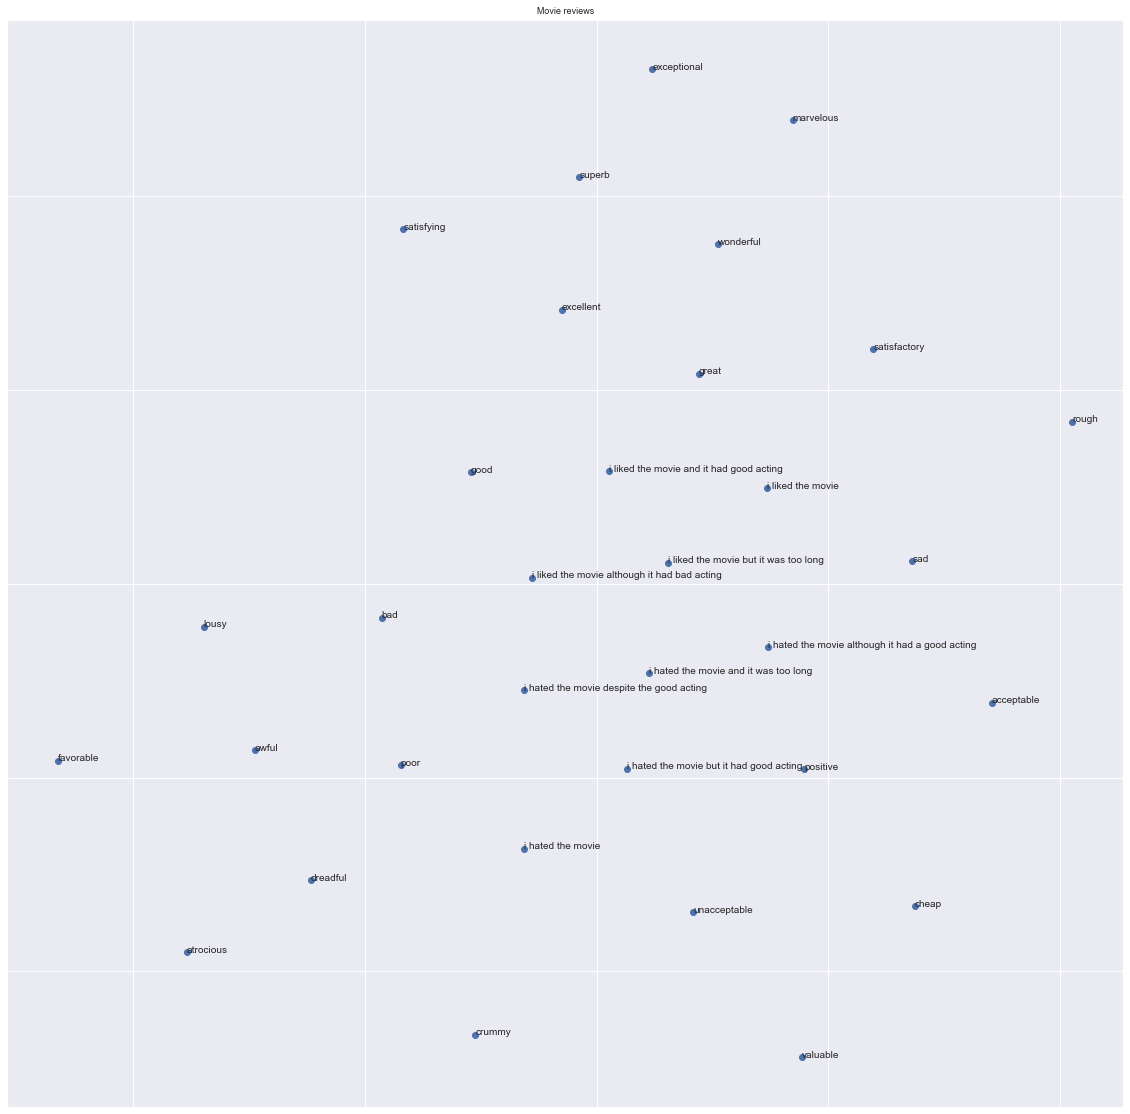

In [451]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(X_tsne_clause_comp[:, 0], X_tsne_clause_comp[:, 1], 'o')
ax.set_title('Movie reviews')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
for i, word in enumerate(sentences_clause_comp + pos_words_thesaurus + neg_words_thesaurus):
	plt.annotate(word, xy=(X_tsne_clause_comp[i, 0], X_tsne_clause_comp[i, 1]))
plt.show()

In [218]:
X_test_vec_neg = doc2vec_model.transform(X_test_blind_neg)
X_test_vec_pos = doc2vec_model.transform(X_test_blind_pos)

cosine_neg = cosine_similarity(X_test_vec_neg)
cosine_pos = cosine_similarity(X_test_vec_pos)

dist_neg = euclidean_distances(X_test_vec_neg)
dist_pos = euclidean_distances(X_test_vec_pos)

nb_neg, dim_neg = cosine_neg.shape
nb_pos, dim_pos = cosine_pos.shape

distrib_neg_cos, distrib_pos_cos = [], []
distrib_neg_dist, distrib_pos_dist = [], []

In [219]:
for index_1 in range(nb_neg-1):
    for index_2 in range(index_1+1,dim_neg):
        distrib_neg_cos.append(cosine_neg[index_1, index_2])
        distrib_neg_dist.append(dist_neg[index_1, index_2])
distrib_neg_cos = np.array(distrib_neg_cos)
distrib_neg_dist = np.array(distrib_neg_dist)

for index_1 in range(nb_pos-1):
    for index_2 in range(index_1+1,dim_pos):
        distrib_pos_cos.append(cosine_pos[index_1, index_2])
        distrib_pos_dist.append(dist_pos[index_1, index_2])
distrib_pos_cos = np.array(distrib_pos_cos)
distrib_pos_dist = np.array(distrib_pos_dist)

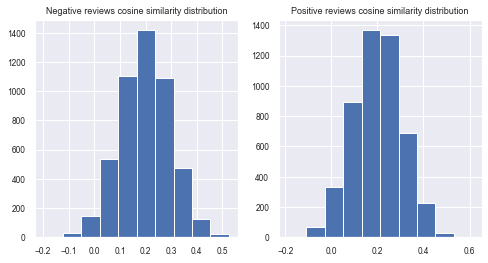

In [221]:
 fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=((8,4)))
 ax1.set_title('Negative reviews cosine similarity distribution')
 ax1.hist(distrib_neg_cos)
 ax2.set_title('Positive reviews cosine similarity distribution')
 ax2.hist(distrib_pos_cos)
 plt.show()

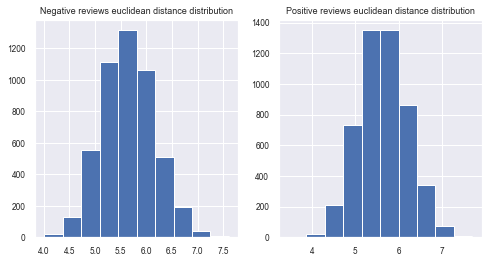

In [223]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=((8,4)))
ax1.set_title('Negative reviews euclidean distance distribution')
ax1.hist(distrib_neg_dist)
ax2.set_title('Positive reviews euclidean distance distribution')
ax2.hist(distrib_pos_dist)
plt.show()